In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Load solution data from csv
DF4oCM = pd.read_csv('Data files/ChatGPT-4o Human Graded - CM.csv')
DF4oQM = pd.read_csv('Data files/ChatGPT-4o Human Graded - QM.csv')
DF4oEM = pd.read_csv('Data files/ChatGPT-4o Human Graded - EM.csv')

DFo1CM = pd.read_csv('Data files/ChatGPT-o1 Human graded - CM.csv')
DFo1QM = pd.read_csv('Data files/ChatGPT-o1 Human graded - QM.csv')
DFo1EM = pd.read_csv('Data files/ChatGPT-o1 Human graded - EM.csv')

DFo3CM = pd.read_csv('Data files/ChatGPT-o3-mini-high Human Graded - CM.csv')
DFo3QM = pd.read_csv('Data files/ChatGPT-o3-mini-high Human Graded - QM.csv')
DFo3EM = pd.read_csv('Data files/ChatGPT-o3-mini-high Human Graded - EM.csv')

DFG15pCM = pd.read_csv('Data files/Gemini 1.5 Human Graded - CM.csv')
DFG15pQM = pd.read_csv('Data files/Gemini 1.5 Human Graded - QM.csv')
DFG15pEM = pd.read_csv('Data files/Gemini 1.5 Human Graded - EM.csv')

DFG20fCM = pd.read_csv('Data files/Gemini 2.0 Flash Human Graded - CM.csv')
DFG20fQM = pd.read_csv('Data files/Gemini 2.0 Flash Human Graded - QM.csv')
DFG20fEM = pd.read_csv('Data files/Gemini 2.0 Flash Human Graded - EM.csv')

DFDSR1CM = pd.read_csv('Data files/Deepseek-R1 Human Graded - CM.csv')
DFDSR1QM = pd.read_csv('Data files/Deepseek-R1 Human Graded - QM.csv')
DFDSR1EM = pd.read_csv('Data files/Deepseek-R1 Human Graded - EM.csv')

DFs = [DF4oCM, DF4oQM, DF4oEM, DFo1CM, DFo1QM, DFo1EM, DFo3CM, DFo3QM, DFo3EM, DFG15pCM, DFG15pQM, DFG15pEM, DFG20fCM, DFG20fQM, DFG20fEM, DFDSR1CM, DFDSR1QM, DFDSR1EM]


In [48]:
DF4oCM.head(13)

,CM,Unnamed: 1,Unnamed: 2,Awarded marks,Unnamed: 4,Unnamed: 5
0,Question,Avaiblable marks,NaN,Solution 1,Solution 2,Solution 3
1,1,4,NaN,4,4,4
2,2,6,NaN,5,5,5
3,3,6,NaN,6,6,6
4,4,18,NaN,18,18,18
5,5,9,NaN,9,9,3
6,6,16,NaN,6,14,12
7,7,13,NaN,13,11,9
8,8,10,NaN,6,6,6
9,9,7,NaN,7,7,7


In [49]:
# Extract total marks available for each subject
total_CMm = DF4oCM.iloc[12, 1]
total_QMm = DF4oQM.iloc[12, 1]
total_EMm = DF4oEM.iloc[12, 1]

# Extract number of marks per question
CM_marks = DF4oCM.iloc[1:11, 1].astype(float)
QM_marks = DF4oQM.iloc[1:11, 1].astype(float)
EM_marks = DF4oEM.iloc[1:11, 1].astype(float)

# Convert into numeric
CM_marks = np.array(pd.to_numeric(CM_marks, errors='coerce'))
QM_marks = np.array(pd.to_numeric(QM_marks, errors='coerce'))
EM_marks = np.array(pd.to_numeric(EM_marks, errors='coerce'))

# Change datatype to int
total_CMm = int(total_CMm)
total_QMm = int(total_QMm)
total_EMm = int(total_EMm)

In [50]:
# Extract mean marks obtained per question for each subject

def extract_marks(df):
    marks = []
    for i in range(1, 11):
        # convert to numeric and handle NaN values
        df.iloc[i, 3:6] = pd.to_numeric(df.iloc[i, 3:6], errors='coerce')
        # calculate mean of marks for each question
        marks.append(df.iloc[i, 3:6].mean())
    return np.array(marks)

GPT4oCMmm = extract_marks(DF4oCM)
GPT4oQMmm = extract_marks(DF4oQM)
GPT4oEMmm = extract_marks(DF4oEM)

GPTo1CMmm = extract_marks(DFo1CM)
GPTo1QMmm = extract_marks(DFo1QM)
GPTo1EMmm = extract_marks(DFo1EM)

GPTo3CMmm = extract_marks(DFo3CM)
GPTo3QMmm = extract_marks(DFo3QM)
GPTo3EMmm = extract_marks(DFo3EM)

Gem15pCMmm = extract_marks(DFG15pCM)
Gem15pQMmm = extract_marks(DFG15pQM)
Gem15pEMmm = extract_marks(DFG15pEM)

Gem20fCMmm = extract_marks(DFG20fCM)
Gem20fQMmm = extract_marks(DFG20fQM)
Gem20fEMmm = extract_marks(DFG20fEM)

DSR1CMmm = extract_marks(DFDSR1CM)
DSR1QMmm = extract_marks(DFDSR1QM)
DSR1EMmm = extract_marks(DFDSR1EM)

# Get averaged percentage of marks per question
GPT4oCMmp =  GPT4oCMmm / CM_marks * 100
GPT4oQMmp = GPT4oQMmm / QM_marks * 100
GPT4oEMmp = GPT4oEMmm / EM_marks * 100

GPTo1CMmp =  GPTo1CMmm / CM_marks * 100
GPTo1QMmp = GPTo1QMmm / QM_marks * 100
GPTo1EMmp = GPTo1EMmm / EM_marks * 100

GPTo3CMmp =  GPTo3CMmm / CM_marks * 100
GPTo3QMmp = GPTo3QMmm / QM_marks * 100
GPTo3EMmp = GPTo3EMmm / EM_marks * 100

Gem15pCMmp =  Gem15pCMmm / CM_marks * 100
Gem15pQMmp = Gem15pQMmm / QM_marks * 100
Gem15pEMmp = Gem15pEMmm / EM_marks * 100

Gem20fCMmp =  Gem20fCMmm / CM_marks * 100
Gem20fQMmp = Gem20fQMmm / QM_marks * 100
Gem20fEMmp = Gem20fEMmm / EM_marks * 100

DSR1CMmp =  DSR1CMmm / CM_marks * 100
DSR1QMmp = DSR1QMmm / QM_marks * 100
DSR1EMmp = DSR1EMmm / EM_marks * 100

# Get averaged percentage of marks across all questions

GPT4oCMtp=  GPT4oCMmm.sum() / total_CMm * 100
GPT4oQMtp = GPT4oQMmm.sum() / total_QMm * 100
GPT4oEMtp = GPT4oEMmm.sum() / total_EMm * 100

GPTo1CMtp =  GPTo1CMmm.sum() / total_CMm * 100
GPTo1QMtp = GPTo1QMmm.sum() / total_QMm * 100
GPTo1EMtp = GPTo1EMmm.sum() / total_EMm * 100

GPTo3CMtp =  GPTo3CMmm.sum() / total_CMm * 100
GPTo3QMtp = GPTo3QMmm.sum() / total_QMm * 100
GPTo3EMtp = GPTo3EMmm.sum() / total_EMm * 100

Gem15pCMtp =  Gem15pCMmm.sum() / total_CMm * 100
Gem15pQMtp = Gem15pQMmm.sum() / total_QMm * 100
Gem15pEMtp = Gem15pEMmm.sum() / total_EMm * 100

Gem20fCMtp =  Gem20fCMmm.sum() / total_CMm * 100
Gem20fQMtp = Gem20fQMmm.sum() / total_QMm * 100
Gem20fEMtp = Gem20fEMmm.sum() / total_EMm * 100

DSR1CMtp =  DSR1CMmm.sum() / total_CMm * 100
DSR1QMtp = DSR1QMmm.sum() / total_QMm * 100
DSR1EMtp = DSR1EMmm.sum() / total_EMm * 100



In [51]:
# Extract vector of marks obtained per question for each subject
def extract_marks_vector(df):
    marks = []
    for i in range(1, 11):
        # convert to numeric and handle NaN values
        df.iloc[i, 3:6] = pd.to_numeric(df.iloc[i, 3:6], errors='coerce')
        # calculate mean of marks for each question
        marks.append(df.iloc[i, 3:6])
    return np.array(marks)

GPT4oCMam = extract_marks_vector(DF4oCM)
GPT4oQMam = extract_marks_vector(DF4oQM)
GPT4oEMam = extract_marks_vector(DF4oEM)

GPTo1CMam = extract_marks_vector(DFo1CM)
GPTo1QMam = extract_marks_vector(DFo1QM)
GPTo1EMam = extract_marks_vector(DFo1EM)

GPTo3CMam = extract_marks_vector(DFo3CM)
GPTo3QMam = extract_marks_vector(DFo3QM)
GPTo3EMam = extract_marks_vector(DFo3EM)

Gem15pCMam = extract_marks_vector(DFG15pCM)
Gem15pQMam = extract_marks_vector(DFG15pQM)
Gem15pEMam = extract_marks_vector(DFG15pEM)

Gem20fCMam = extract_marks_vector(DFG20fCM)
Gem20fQMam = extract_marks_vector(DFG20fQM)
Gem20fEMam = extract_marks_vector(DFG20fEM)

DSR1CMam = extract_marks_vector(DFDSR1CM)
DSR1QMam = extract_marks_vector(DFDSR1QM)
DSR1EMam = extract_marks_vector(DFDSR1EM)

# Get percentage of marks obtained per question for each subject

temp1 = GPT4oCMam
temp2 = GPT4oQMam
temp3 = GPT4oEMam
temp4 = GPTo1CMam
temp5 = GPTo1QMam
temp6 = GPTo1EMam
temp7 = GPTo3CMam
temp8 = GPTo3QMam
temp9 = GPTo3EMam
temp10 = Gem15pCMam
temp11 = Gem15pQMam
temp12 = Gem15pEMam
temp13 = Gem20fCMam
temp14 = Gem20fQMam
temp15 = Gem20fEMam
temp16 = DSR1CMam
temp17 = DSR1QMam
temp18 = DSR1EMam

for i in range(10):
    temp1 = GPT4oCMam[i] / CM_marks[i] * 100
    temp2 = GPT4oQMam[i] / QM_marks[i] * 100
    temp3 = GPT4oEMam[i] / EM_marks[i] * 100

    temp4 = GPTo1CMam[i] / CM_marks[i] * 100
    temp5 = GPTo1QMam[i] / QM_marks[i] * 100
    temp6 = GPTo1EMam[i] / EM_marks[i] * 100

    temp7 = GPTo3CMam[i] / CM_marks[i] * 100
    temp8 = GPTo3QMam[i] / QM_marks[i] * 100
    temp9 = GPTo3EMam[i] / EM_marks[i] * 100

    temp10 = Gem15pCMam[i] / CM_marks[i] * 100
    temp11 = Gem15pQMam[i] / QM_marks[i] * 100
    temp12 = Gem15pEMam[i] / EM_marks[i] * 100

    temp13 = Gem20fCMam[i] / CM_marks[i] * 100
    temp14 = Gem20fQMam[i] / QM_marks[i] * 100
    temp15 = Gem20fEMam[i] / EM_marks[i] * 100

    temp16 = DSR1CMam[i] / CM_marks[i] * 100
    temp17 = DSR1QMam[i] / QM_marks[i] * 100
    temp18 = DSR1EMam[i] / EM_marks[i] * 100
    

    # rename
    GPT4oCMap = temp1
    GPT4oQMap = temp2
    GPT4oEMap = temp3

    GPTo1CMap = temp4
    GPTo1QMap = temp5
    GPTo1EMap = temp6

    GPTo3CMap = temp7
    GPTo3QMap = temp8
    GPTo3EMap = temp9

    Gem15pCMap = temp10
    Gem15pQMap = temp11
    Gem15pEMap = temp12

    Gem20fCMap = temp13
    Gem20fQMap = temp14
    Gem20fEMap = temp15

    DSR1CMap = temp16
    DSR1QMap = temp17
    DSR1EMap = temp18



In [52]:
# Bar chart creator 

def bar_chart(methods, averages, title):
    plt.figure(figsize=(8, 6))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'][:len(methods)]
    bars = plt.bar(methods, averages, color=colors, edgecolor='black', linewidth=1.2)

    # Add value labels above bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}',
                 ha='center', va='bottom', fontsize=10)

    # Enhance readability
    plt.title(title, fontsize=14, weight='bold')
    plt.ylabel('Averaged score (%)', fontsize=12)
    plt.xlabel('Model and subject', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.xticks(fontsize=11, rotation=45, ha='right') # Rotated labels
    plt.yticks(fontsize=11)
    plt.ylim(0, 105)  # Set y-axis limit to 100%
    plt.tight_layout()
    plt.show()
    #plt.savefig(f'{title}.png', dpi=300, bbox_inches='tight')

In [53]:
# Create a list of methods and their corresponding averages

# ChaGPT-4o, o1 and o3
methods_4o = ['ChatGPT-4o CM', 'ChatGPT-4o QM', 'ChatGPT-4o EM']
averages_4o = [GPT4oCMtp, GPT4oQMtp, GPT4oEMtp]
methods_o1 = ['ChatGPT-o1 CM', 'ChatGPT-o1 QM', 'ChatGPT-o1 EM']
averages_o1 = [GPTo1CMtp, GPTo1QMtp, GPTo1EMtp]
methods_o3 = ['ChatGPT-o3-mini-high CM', 'ChatGPT-o3-mini-high QM', 'ChatGPT-o3-mini-high EM']
averages_o3 = [GPTo3CMtp, GPTo3QMtp, GPTo3EMtp]
methods_Gem15p = ['Gemini 1.5 CM', 'Gemini 1.5 QM', 'Gemini 1.5 EM']
averages_Gem15p = [Gem15pCMtp, Gem15pQMtp, Gem15pEMtp]
methods_Gem20f = ['Gemini 2.0 Flash CM', 'Gemini 2.0 Flash QM', 'Gemini 2.0 Flash EM']
averages_Gem20f = [Gem20fCMtp, Gem20fQMtp, Gem20fEMtp]
methods_DSR1 = ['Deepseek-R1 CM', 'Deepseek-R1 QM', 'Deepseek-R1 EM']
averages_DSR1 = [DSR1CMtp, DSR1QMtp, DSR1EMtp]

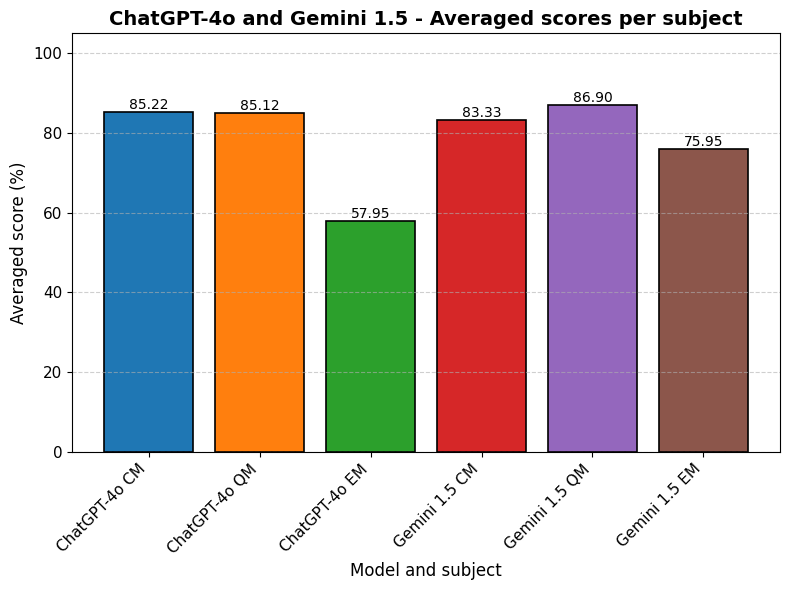

In [54]:
# plot by generation 

methods = methods_4o + methods_Gem15p 
averages = averages_4o + averages_Gem15p
bar_chart(methods, averages, 'ChatGPT-4o and Gemini 1.5 - Averaged scores per subject')

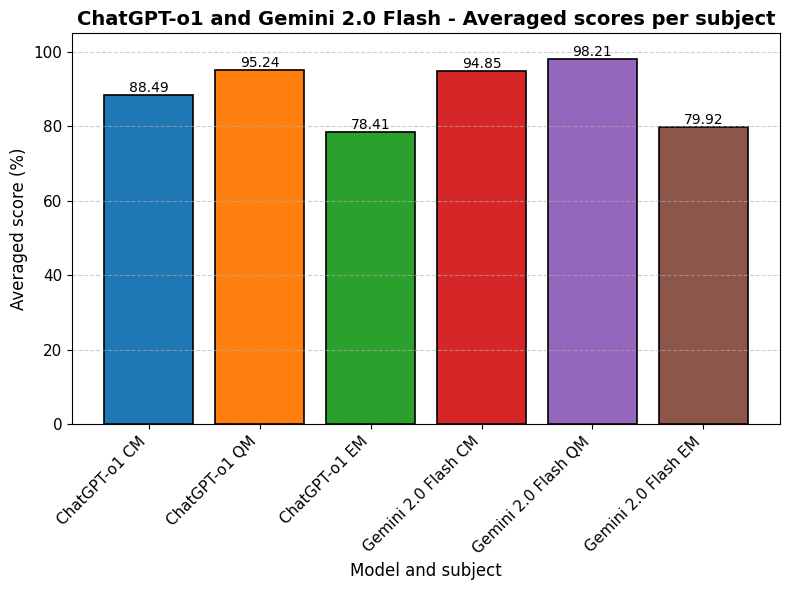

In [55]:
# o1 and 2.0

methods = methods_o1 + methods_Gem20f
averages = averages_o1 + averages_Gem20f
bar_chart(methods, averages, 'ChatGPT-o1 and Gemini 2.0 Flash - Averaged scores per subject')

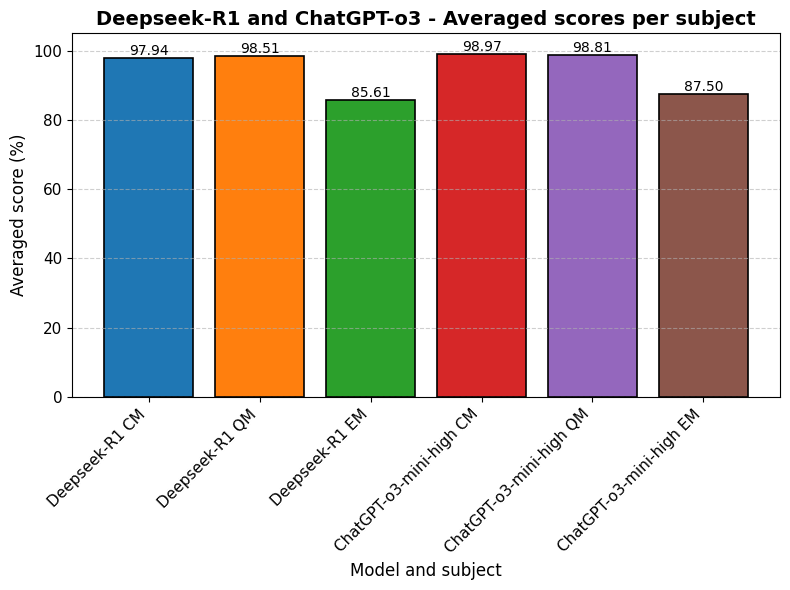

In [56]:
# o3 and DSR1
methods = methods_DSR1 + methods_o3
averages = averages_DSR1 + averages_o3 
bar_chart(methods, averages, 'Deepseek-R1 and ChatGPT-o3 - Averaged scores per subject')

In [57]:
print(GPT4oEMmm)

[7.33333333 4.         9.66666667 9.66666667 1.66666667 4.33333333
 2.66666667 1.66666667 7.         3.        ]


In [58]:
# Make heat plot of averaged marks for all questions 
import seaborn as sns

def heat_plot(averages, x, title):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Use seaborn heatmap
    sns.heatmap(averages, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Averaged score (%)'},
                xticklabels=[f'Q{i+1}' for i in range(10)],
                yticklabels=x,
                ax=ax)

    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel('Question number', fontsize=12)
    plt.ylabel('Model and subject', fontsize=12)
    plt.tight_layout()
    plt.show()
    #plt.savefig(f'{title}.png', dpi=300, bbox_inches='tight')



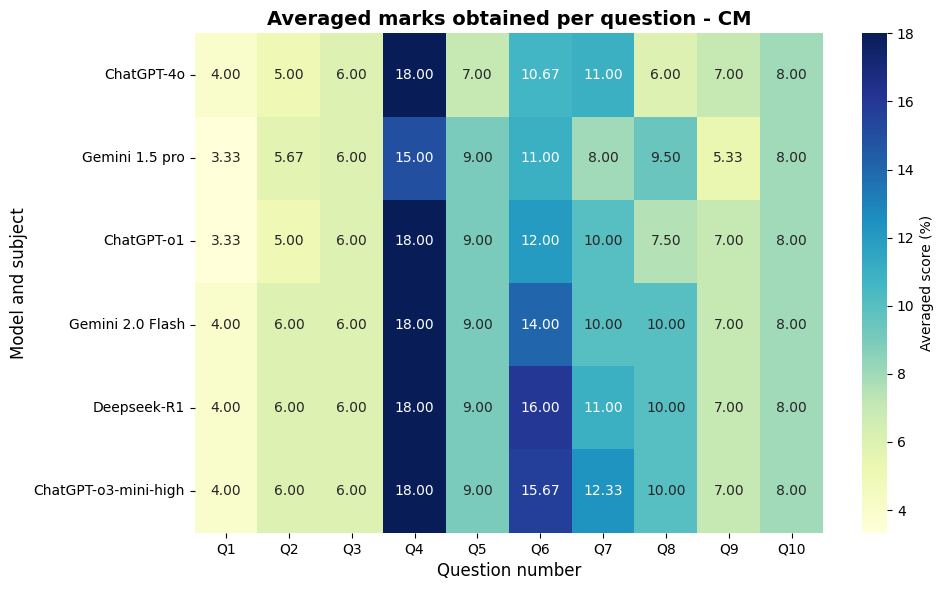

In [59]:
# plot heatmap of averaged marks per question CM

CM_pq_averages = [GPT4oCMmm, Gem15pCMmm, GPTo1CMmm, Gem20fCMmm, DSR1CMmm, GPTo3CMmm]
methods = ['ChatGPT-4o', 'Gemini 1.5 pro', 'ChatGPT-o1', 'Gemini 2.0 Flash', 'Deepseek-R1', 'ChatGPT-o3-mini-high']
heat_plot(CM_pq_averages, methods, 'Averaged marks obtained per question - CM')



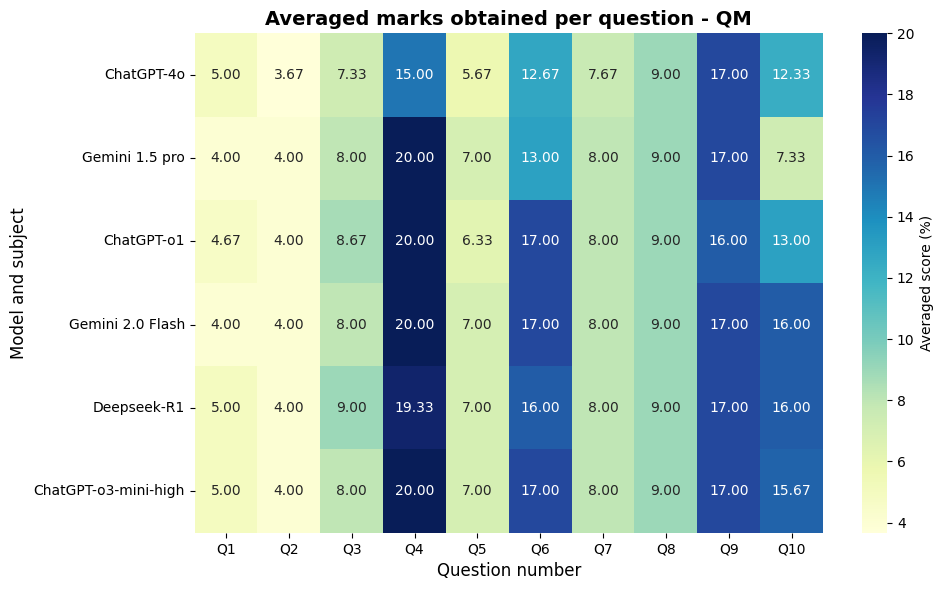

In [60]:
# plot heatmap of averaged marks per question QM
QM_pq_averages = [GPT4oQMmm, Gem15pQMmm, GPTo1QMmm, Gem20fQMmm, DSR1QMmm, GPTo3QMmm]
methods = ['ChatGPT-4o', 'Gemini 1.5 pro', 'ChatGPT-o1', 'Gemini 2.0 Flash', 'Deepseek-R1', 'ChatGPT-o3-mini-high']
heat_plot(QM_pq_averages, methods, 'Averaged marks obtained per question - QM')

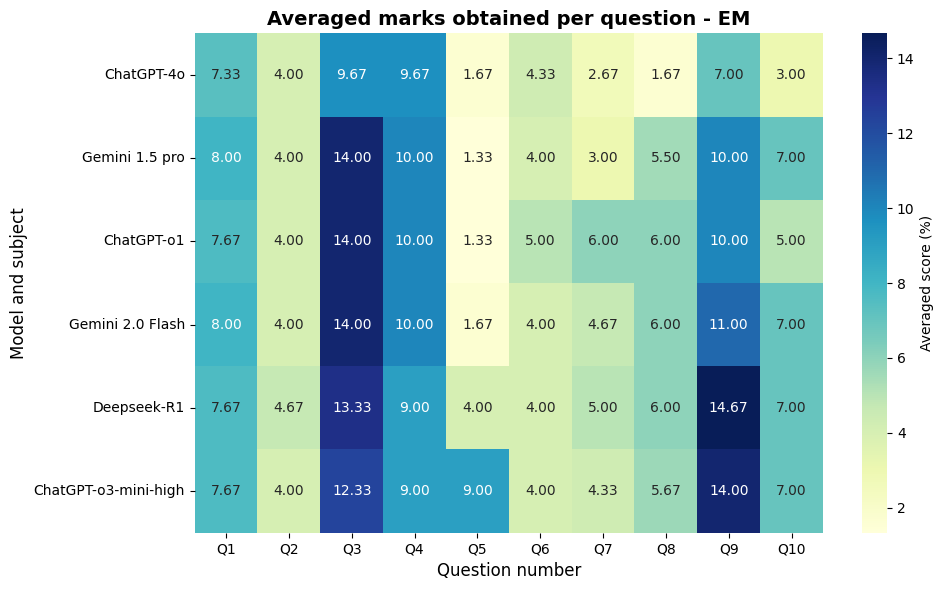

In [61]:
# plot heatmap of averaged marks per question EM
EM_pq_averages = [GPT4oEMmm, Gem15pEMmm, GPTo1EMmm, Gem20fEMmm, DSR1EMmm, GPTo3EMmm]
methods = ['ChatGPT-4o', 'Gemini 1.5 pro', 'ChatGPT-o1', 'Gemini 2.0 Flash', 'Deepseek-R1', 'ChatGPT-o3-mini-high']
heat_plot(EM_pq_averages, methods, 'Averaged marks obtained per question - EM')

[[4 4 4]
 [5 5 5]
 [6 6 6]
 [18 18 18]
 [9 9 3]
 [6 14 12]
 [13 11 9]
 [6 6 6]
 [7 7 7]
 [8 8 8]]


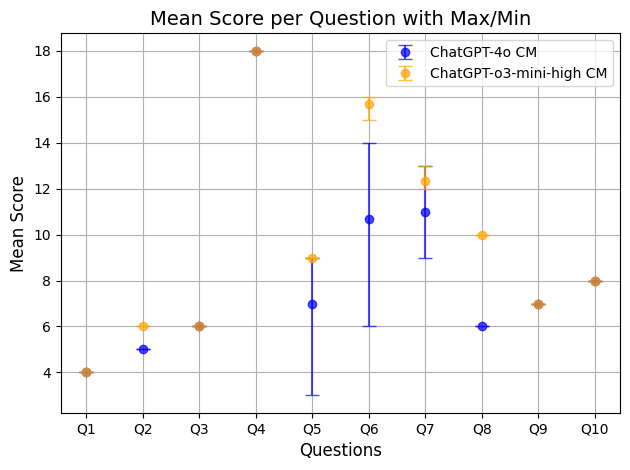

In [67]:
# plot mean score per question with maximum and minimum marks given 

Qs = np.array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'])

def yerr(y_vector):
    N = len(y_vector)
    yerr = np.zeros((2,N))
    for i in range(N):
        y_mean = y_vector[i].mean()
        yerr[0,i] = y_mean - y_vector[i].min()
        yerr[1,i] = y_vector[i].max() - y_mean
    
    return yerr

yerr4oCM = yerr(GPT4oCMam)
yerro3CM = yerr(GPTo3CMam)

print(GPT4oCMam)

yerr4oQM = yerr(GPT4oQMam)
yerro3QM = yerr(GPTo3QMam)
yerr4oEM = yerr(GPT4oEMam)
yerro3EM = yerr(GPTo3EMam)


plt.errorbar(Qs, GPT4oCMmm, yerr=yerr4oCM, fmt='o', capsize=5, label='ChatGPT-4o CM', color='blue', alpha=0.7)
plt.errorbar(Qs, GPTo3CMmm, yerr=yerro3CM, fmt='o', capsize=5, label='ChatGPT-o3-mini-high CM', color='orange', alpha=0.7)

plt.grid(True)

plt.xlabel('Questions', fontsize=12)
plt.ylabel('Mean Score', fontsize=12)
plt.title('Mean Score per Question with Max/Min', fontsize=14)
plt.legend()
plt.xticks(Qs)
plt.tight_layout()
plt.show()

#plt.savefig(f'Variance plot GPT4o and o3 CM', dpi=300, bbox_inches='tight')



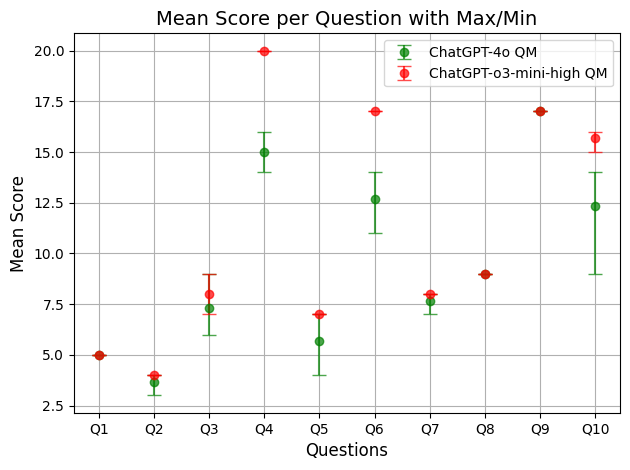

In [63]:
plt.errorbar(Qs, GPT4oQMmm, yerr=yerr4oQM, fmt='o', capsize=5, label='ChatGPT-4o QM', color='green', alpha=0.7)
plt.errorbar(Qs, GPTo3QMmm, yerr=yerro3QM, fmt='o', capsize=5, label='ChatGPT-o3-mini-high QM', color='red', alpha=0.7)


plt.grid(True)

plt.xlabel('Questions', fontsize=12)
plt.ylabel('Mean Score', fontsize=12)
plt.title('Mean Score per Question with Max/Min', fontsize=14)
plt.legend()
plt.xticks(Qs)
plt.tight_layout()
#plt.savefig(f'Variance plot GPT4o and o3 QM', dpi=300, bbox_inches='tight')



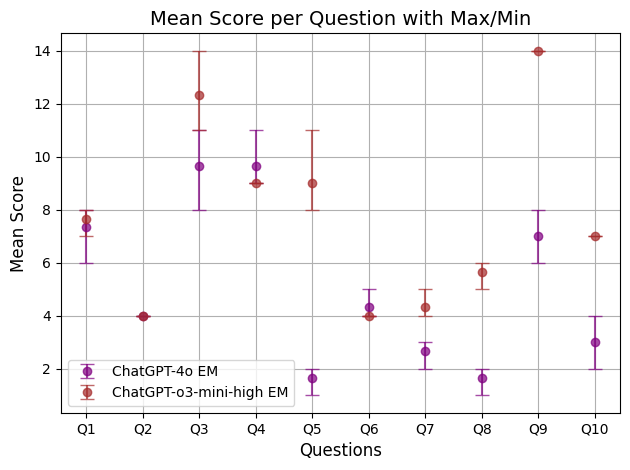

In [64]:
plt.errorbar(Qs, GPT4oEMmm, yerr=yerr4oEM, fmt='o', capsize=5, label='ChatGPT-4o EM', color='purple', alpha=0.7)
plt.errorbar(Qs, GPTo3EMmm, yerr=yerro3EM, fmt='o', capsize=5, label='ChatGPT-o3-mini-high EM', color='brown', alpha=0.7)


plt.grid(True)

plt.xlabel('Questions', fontsize=12)
plt.ylabel('Mean Score', fontsize=12)
plt.title('Mean Score per Question with Max/Min', fontsize=14)
plt.legend()
plt.xticks(Qs)
plt.tight_layout()
#plt.savefig(f'Variance plot GPT4o and o3 EM', dpi=300, bbox_inches='tight')


/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


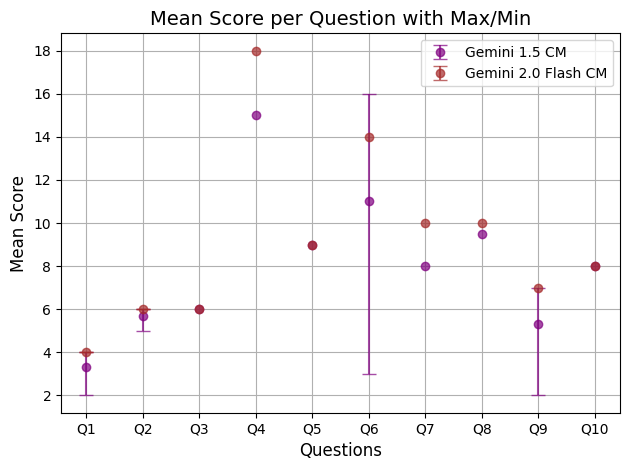

In [ ]:
# rest 

yerrG15CM = yerr(Gem15pCMam)
yerroG20CM = yerr(Gem20fCMam)
yerrG15QM = yerr(Gem15pQMam)
yerroG20QM = yerr(Gem20fQMam)
yerrG15EM = yerr(Gem15pEMam)
yerroG20EM = yerr(Gem20fEMam)

yerrDSR1CM = yerr(DSR1CMam)
yerrDSR1EM = yerr(DSR1EMam)
yerrDSR1QM = yerr(DSR1CMam)
yerro1CM = yerr(GPTo1CMam)
yerro1EM = yerr(GPTo1EMam)
yerro1QM = yerr(GPTo1CMam)

plt.errorbar(Qs, Gem15pCMmm, yerr=yerrG15CM, fmt='o', capsize=5, label='Gemini 1.5 CM', color='purple', alpha=0.7)
plt.errorbar(Qs, Gem20fCMmm, yerr=yerroG20CM, fmt='o', capsize=5, label='Gemini 2.0 Flash CM', color='brown', alpha=0.7)
plt.grid(True)
plt.xlabel('Questions', fontsize=12)
plt.ylabel('Mean Score', fontsize=12)
plt.title('Mean Score per Question with Max/Min', fontsize=14)
plt.legend()
plt.xticks(Qs)
plt.tight_layout()
#plt.savefig(f'Variance plot Gemini 1,5 and 2,0 for CM', dpi=300, bbox_inches='tight')


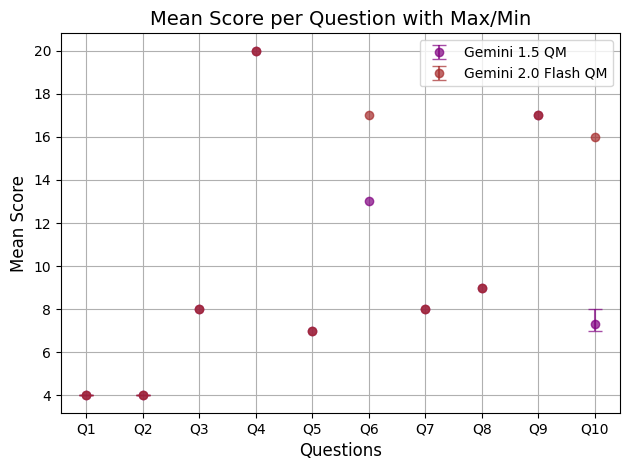

In [ ]:

plt.errorbar(Qs, Gem15pQMmm, yerr=yerrG15QM, fmt='o', capsize=5, label='Gemini 1.5 QM', color='purple', alpha=0.7)
plt.errorbar(Qs, Gem20fQMmm, yerr=yerroG20QM, fmt='o', capsize=5, label='Gemini 2.0 Flash QM', color='brown', alpha=0.7)
plt.grid(True)
plt.xlabel('Questions', fontsize=12)
plt.ylabel('Mean Score', fontsize=12)
plt.title('Mean Score per Question with Max/Min', fontsize=14)
plt.legend()
plt.xticks(Qs)
plt.tight_layout()
#plt.savefig(f'Variance plot Gemini 1,5 and 2,0 for QM', dpi=300, bbox_inches='tight')




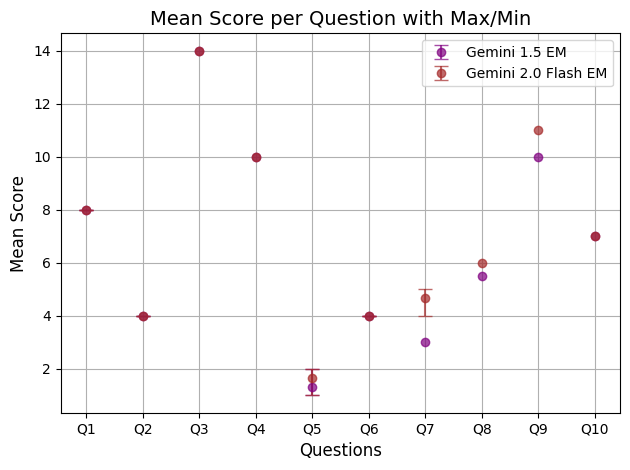

In [ ]:

plt.errorbar(Qs, Gem15pEMmm, yerr=yerrG15EM, fmt='o', capsize=5, label='Gemini 1.5 EM', color='purple', alpha=0.7)
plt.errorbar(Qs, Gem20fEMmm, yerr=yerroG20EM, fmt='o', capsize=5, label='Gemini 2.0 Flash EM', color='brown', alpha=0.7)
plt.grid(True)
plt.xlabel('Questions', fontsize=12)
plt.ylabel('Mean Score', fontsize=12)
plt.title('Mean Score per Question with Max/Min', fontsize=14)
plt.legend()
plt.xticks(Qs)
plt.tight_layout()

#plt.savefig(f'Variance plot Gemini 1,5 and 2,0 for EM', dpi=300, bbox_inches='tight')



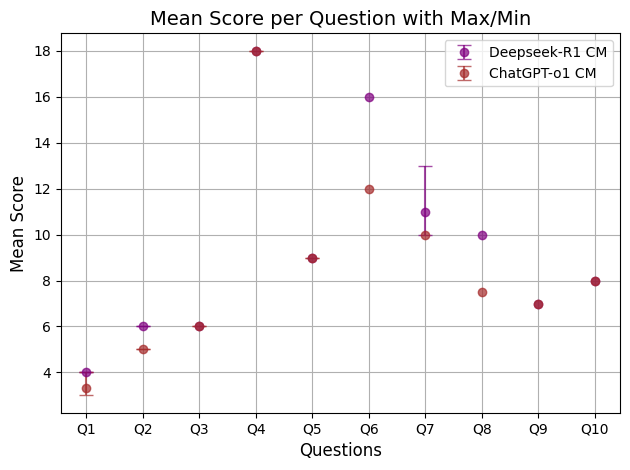

In [ ]:
plt.errorbar(Qs, DSR1CMmm, yerr=yerrDSR1CM, fmt='o', capsize=5, label='Deepseek-R1 CM', color='purple', alpha=0.7)
plt.errorbar(Qs, GPTo1CMmm, yerr=yerro1CM, fmt='o', capsize=5, label='ChatGPT-o1 CM', color='brown', alpha=0.7)
plt.grid(True)
plt.xlabel('Questions', fontsize=12)
plt.ylabel('Mean Score', fontsize=12)
plt.title('Mean Score per Question with Max/Min', fontsize=14)
plt.legend()
plt.xticks(Qs)
plt.tight_layout()

#plt.savefig(f'Variance plot Deepseek and GPTo3 for CM', dpi=300, bbox_inches='tight')


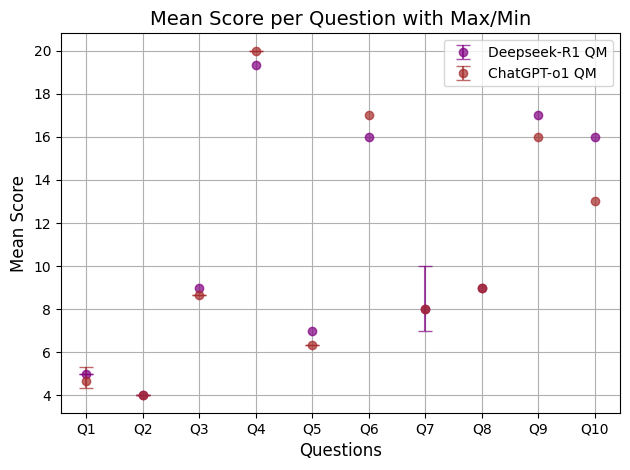

In [ ]:
plt.errorbar(Qs, DSR1QMmm, yerr=yerrDSR1QM, fmt='o', capsize=5, label='Deepseek-R1 QM', color='purple', alpha=0.7)
plt.errorbar(Qs, GPTo1QMmm, yerr=yerro1QM, fmt='o', capsize=5, label='ChatGPT-o1 QM', color='brown', alpha=0.7)
plt.grid(True)
plt.xlabel('Questions', fontsize=12)
plt.ylabel('Mean Score', fontsize=12)
plt.title('Mean Score per Question with Max/Min', fontsize=14)
plt.legend()
plt.xticks(Qs)
plt.tight_layout()

#plt.savefig(f'Variance plot Deepseek and GPTo3 for QM', dpi=300, bbox_inches='tight')


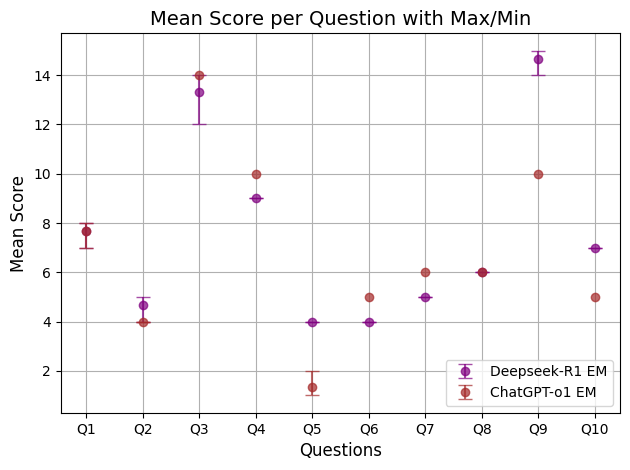

In [ ]:
plt.errorbar(Qs, DSR1EMmm, yerr=yerrDSR1EM, fmt='o', capsize=5, label='Deepseek-R1 EM', color='purple', alpha=0.7)
plt.errorbar(Qs, GPTo1EMmm, yerr=yerro1EM, fmt='o', capsize=5, label='ChatGPT-o1 EM', color='brown', alpha=0.7)
plt.grid(True)
plt.xlabel('Questions', fontsize=12)
plt.ylabel('Mean Score', fontsize=12)
plt.title('Mean Score per Question with Max/Min', fontsize=14)
plt.legend()
plt.xticks(Qs)
plt.tight_layout()
#plt.savefig(f'Variance plot Deepseek and GPTo3 for EM', dpi=300, bbox_inches='tight')
